# Project 5: EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

## Load data

In [2]:
df = pd.read_csv('../Data/salary_cleaned.csv')
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,year,month,year_month,timestamp_3mos,year_month_3mos,state_short,inflation_rate,inflation_rate_3mos,state,employment_rate,employment_rate_3mos
0,2018-06-03 13:58:20,Yahoo,IC2,Software Engineer,160.5,"Sunnyvale, CA",0.58,0.58,Full Stack,2018,6,2018-06,2018-03-03 13:58:20,2018-03,CA,0.029,0.024,California,0.957660,0.956797
1,2018-06-04 20:28:22,Facebook,E3,Software Engineer,165.0,"Seattle, WA",1.00,1.00,Full Stack,2018,6,2018-06,2018-03-04 20:28:22,2018-03,WA,0.029,0.024,Washington,0.955998,0.954978
2,2018-06-05 00:56:33,VmWare,Senior MTS,Software Engineer,218.0,"Palo Alto, CA",8.00,1.00,Distributed Systems (Back-End),2018,6,2018-06,2018-03-05 00:56:33,2018-03,CA,0.029,0.024,California,0.957660,0.956797
3,2018-06-05 01:19:05,Uber,L4,Software Engineer,240.0,"San Francisco, CA",3.00,0.00,Web Development (Front-End),2018,6,2018-06,2018-03-05 01:19:05,2018-03,CA,0.029,0.024,California,0.957660,0.956797
4,2018-06-05 07:13:17,Capital One,Master Software Engineer,Software Engineer,196.0,"New York, NY",8.00,2.00,iOS,2018,6,2018-06,2018-03-05 07:13:17,2018-03,NY,0.029,0.024,New York,0.959053,0.955962


In [3]:
df.shape

(24496, 20)

## EDA

In [4]:
df.isnull().sum()

timestamp                  0
company                    0
level                      0
title                      0
totalyearlycompensation    0
location                   0
yearsofexperience          0
yearsatcompany             0
tag                        0
year                       0
month                      0
year_month                 0
timestamp_3mos             0
year_month_3mos            0
state_short                0
inflation_rate             0
inflation_rate_3mos        0
state                      0
employment_rate            0
employment_rate_3mos       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24496 entries, 0 to 24495
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                24496 non-null  object 
 1   company                  24496 non-null  object 
 2   level                    24496 non-null  object 
 3   title                    24496 non-null  object 
 4   totalyearlycompensation  24496 non-null  float64
 5   location                 24496 non-null  object 
 6   yearsofexperience        24496 non-null  float64
 7   yearsatcompany           24496 non-null  float64
 8   tag                      24496 non-null  object 
 9   year                     24496 non-null  int64  
 10  month                    24496 non-null  int64  
 11  year_month               24496 non-null  object 
 12  timestamp_3mos           24496 non-null  object 
 13  year_month_3mos          24496 non-null  object 
 14  state_short           

### Examine categorical variables

In [41]:
df[['company','level','title','state','location']].apply(lambda x: len(x.unique()))

company     1284
level       1603
title         15
state         47
location     447
dtype: int64

In [22]:
df['company'].value_counts(normalize=True)

Amazon             0.115162
Microsoft          0.106915
Google             0.081891
Facebook           0.056172
Apple              0.044415
                     ...   
Cox Automotive     0.000041
Bank Of America    0.000041
Segment            0.000041
CiSco              0.000041
Zoom               0.000041
Name: company, Length: 1284, dtype: float64

In [42]:
df['level'].value_counts(normalize=True)

L4                                   0.073236
L5                                   0.064296
L3                                   0.046212
L6                                   0.035965
Senior Software Engineer             0.023677
                                       ...   
Senior Staff Manager                 0.000041
Strategic Advancement Advisor        0.000041
ZEN6                                 0.000041
senior hardware security engineer    0.000041
M0                                   0.000041
Name: level, Length: 1603, dtype: float64

In [43]:
df['title'].value_counts(normalize=True)

Software Engineer               0.680805
Product Manager                 0.074788
Software Engineering Manager    0.057315
Data Scientist                  0.040660
Hardware Engineer               0.037108
Product Designer                0.025392
Technical Program Manager       0.016778
Solution Architect              0.016370
Management Consultant           0.012002
Business Analyst                0.009389
Marketing                       0.008573
Recruiter                       0.005756
Sales                           0.005756
Mechanical Engineer             0.005593
Human Resources                 0.003715
Name: title, dtype: float64

In [44]:
df['state'].value_counts(normalize=True)

California              0.460851
Washington              0.250367
New York                0.081279
Texas                   0.042089
Massachusetts           0.032169
Illinois                0.014247
Virginia                0.013472
Oregon                  0.010696
Colorado                0.010410
District of Columbia    0.010247
New Jersey              0.008165
Pennsylvania            0.008001
Georgia                 0.007552
North Carolina          0.006981
Arizona                 0.006246
Minnesota               0.004654
Florida                 0.004491
Utah                    0.004041
Wisconsin               0.003470
Michigan                0.002939
Missouri                0.002858
Ohio                    0.002327
Connecticut             0.001592
Arkansas                0.001510
Indiana                 0.001388
Maryland                0.001143
Tennessee               0.001061
Delaware                0.001021
Idaho                   0.000612
Iowa                    0.000572
Kansas    

**Observation**: 
1. In the data, there are 1284 companies, 15 titles, and 47 states.
2. The top 5 companies are Amazon, Microsoft, Google, Facebook, and Apple.
3. The top 5 titles are Software Engineer, Product Manager, Software Engineering Manager, Data Scientist and Hardware Engineer.
4. The top states are California, Washington, New York, and Massachusetts.

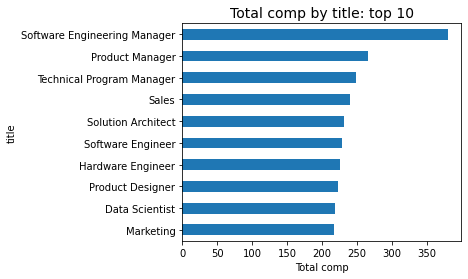

In [88]:
#df.groupby('title')['totalyearlycompensation'].mean().sort_values(ascending=False)

plt.figure(figsize=(5,4))
df.groupby(['title'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total comp by title: top 10', fontsize=14)
plt.xlabel('Total comp'); 

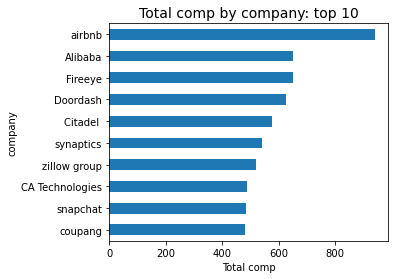

In [87]:
plt.figure(figsize=(5,4))
df.groupby(['company'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total comp by company: top 10', fontsize=14)
plt.xlabel('Total comp'); 

Text(0.5, 0, 'Total comp')

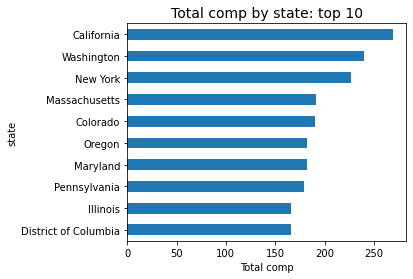

In [99]:
plt.figure(figsize=(5,4))
df.groupby(['state'])['totalyearlycompensation'].mean().sort_values().tail(10).plot(kind='barh')
plt.title('Total comp by state: top 10', fontsize=14)
plt.xlabel('Total comp')

In [6]:
# convert year and month to strings
# df[['year','month']] = df[['year','month']].astype(str)
# df.info()

### Examine numeric features

In [7]:
df.describe()

,totalyearlycompensation,yearsofexperience,yearsatcompany,year,month,inflation_rate,inflation_rate_3mos,employment_rate,employment_rate_3mos
count,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000,24496.000000
mean,236.763961,7.158433,2.700132,2019.508124,6.589606,0.015411,0.015649,0.925572,0.930437
std,130.793829,5.982022,3.290854,0.652234,3.070840,0.006829,0.008444,0.044118,0.048737
min,15.000000,0.000000,0.000000,2018.000000,1.000000,0.001000,0.001000,0.759883,0.747221
25%,158.000000,3.000000,0.000000,2019.000000,4.000000,0.013000,0.006000,0.889769,0.899878
50%,205.000000,6.000000,2.000000,2020.000000,7.000000,0.016000,0.018000,0.955321,0.957692
75%,280.000000,10.000000,4.000000,2020.000000,9.000000,0.021000,0.023000,0.960693,0.961051
max,4950.000000,41.000000,34.000000,2020.000000,12.000000,0.030000,0.030000,0.976102,0.976363


Text(0.5, 1.0, 'Years at company')

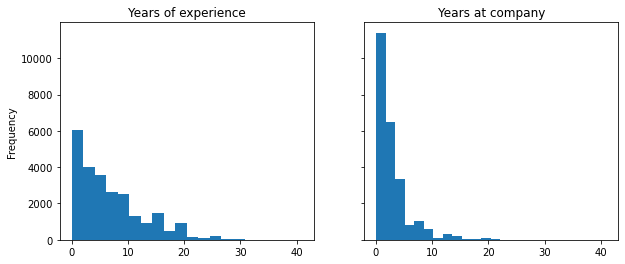

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1 = df['yearsofexperience'].plot(kind='hist', bins=20, ax=axes[0])
ax1.set_title('Years of experience')

ax2 = df['yearsatcompany'].plot(kind='hist', bins=20, ax=axes[1])
ax2.set_title('Years at company')

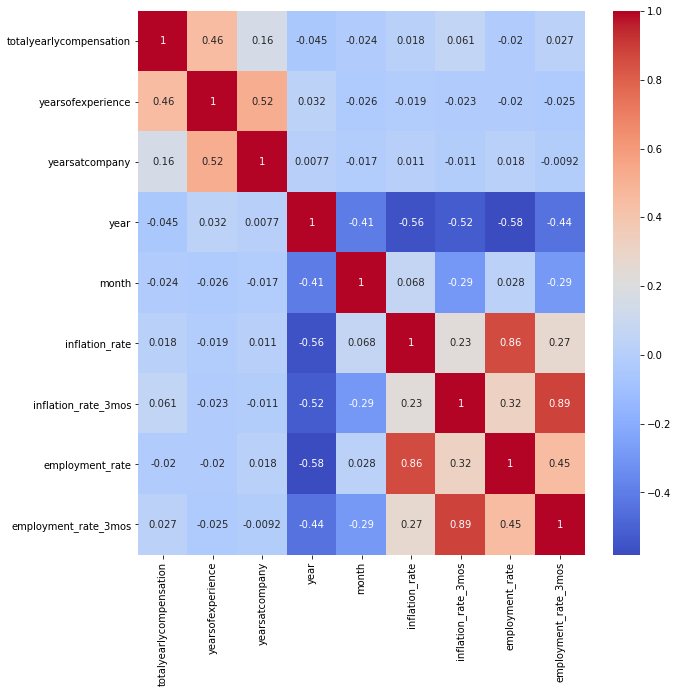

In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm'); 

**Observation**:
1. Total yearly compensation is mostly correlated with years of experience followed by years at the company. 
2. Total yearly compensation seems more related to inflation and employment rates 3 months ago than the current months, though the corelations are all very small, probably not statistical significant.

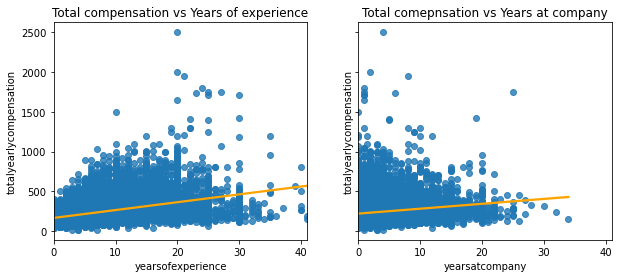

In [54]:
fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsofexperience', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[0])
ax1.set_title('Total compensation vs Years of experience')

ax2 = sns.regplot(data=df.loc[df['totalyearlycompensation'] < 4000, :], 
                  x='yearsatcompany', 
                  y='totalyearlycompensation', 
                  line_kws={'color':'orange'},
                  ax=axes[1])

ax2.set_title('Total comepnsation vs Years at company');

AttributeError: 'FacetGrid' object has no attribute 'set_xlabel'

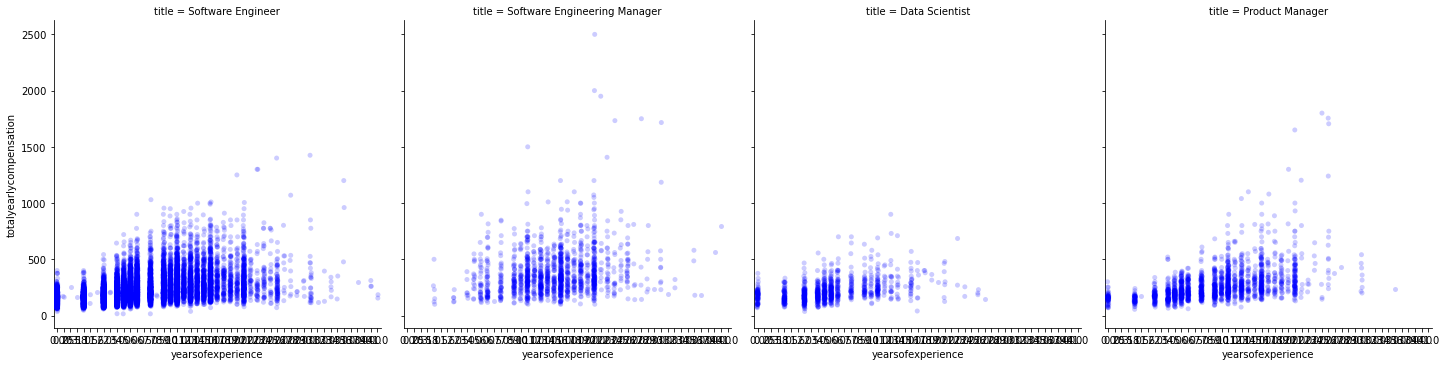

In [111]:
ax = sns.catplot(data=df.loc[(df['totalyearlycompensation'] < 4000) & (df['title'].isin(['Software Engineer','Software Engineering Manager','Data Scientist','Product Manager'])), :], 
                  x='yearsofexperience', 
                  y='totalyearlycompensation', 
                  col='title',   
                  color='blue',
                  alpha=0.2
               )
ax.set_xlabel('Years of experience')
#ax.set_xticks((0,5,10,15,20,25,30,35,40))
;

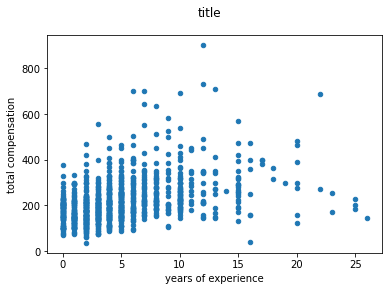

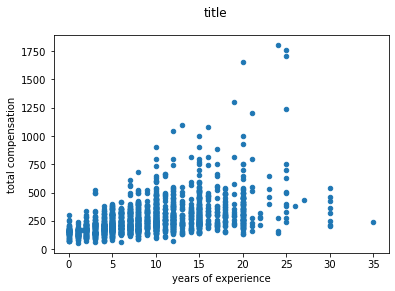

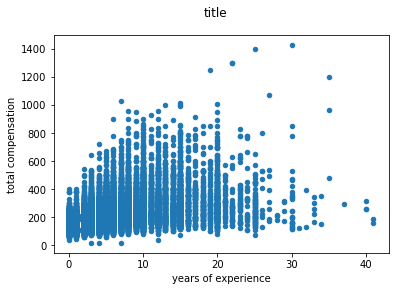

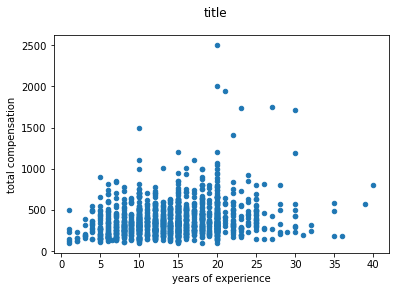

In [126]:
df.loc[(df['totalyearlycompensation'] < 4000) & (df['title'].isin(['Software Engineer','Software Engineering Manager','Data Scientist','Product Manager'])), :]\
  .groupby('title').plot(kind='scatter', 
                         x='yearsofexperience',
                         y='totalyearlycompensation',
                         title='title',
                         xlabel='years of experience',
                         ylabel='total compensation',
                         subplots=True
                         #,
                         #layout=(1,4)
                        );

**Observation**: Total yearly compensation is mostly correlated with years of experience followed by years at the company. 

In [141]:
pd.to_datetime(df['timestamp']).dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
24491    2020
24492    2020
24493    2020
24494    2020
24495    2020
Name: timestamp, Length: 24496, dtype: int64

In [154]:
timestamp_max = max(pd.to_datetime(df['timestamp'])).strftime('%y/%m/%d')
timestamp_min = min(pd.to_datetime(df['timestamp'])).strftime(('%y/%m/%d'))
timestamp_min, timestamp_max

('18/06/03', '20/09/30')

''

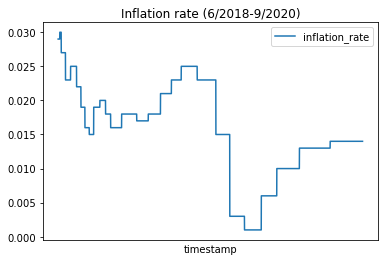

In [159]:
# inflaiton rate
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

#fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)

''' doesn't work!!!
timestamp_max = max(pd.to_datetime(df['timestamp']))
timestamp_min = min(pd.to_datetime(df['timestamp']))

timestamp_max_label = max(pd.to_datetime(df['timestamp'])).strftime('%y/%m/%d')
timestamp_min_label = min(pd.to_datetime(df['timestamp'])).strftime(('%y/%m/%d'))
'''

ax1 = df.plot(x='timestamp', y='inflation_rate')
ax1.set_title('Inflation rate (6/2018-9/2020)')
#ax1.set_xticks(timestamp_min, timestamp_max)
#ax1.set_xticklabels(timestamp_min_label, timestamp_max_label)


ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

;

In [ ]:
# inflaiton rate
# https://stackoverflow.com/questions/12998430/remove-xticks-in-a-matplotlib-plot

#fig, axes = plt.subplots(1, 2, figsize=(10,4), sharex=True)

''' doesn't work!!!
timestamp_max = max(pd.to_datetime(df['timestamp']))
timestamp_min = min(pd.to_datetime(df['timestamp']))

timestamp_max_label = max(pd.to_datetime(df['timestamp'])).strftime('%y/%m/%d')
timestamp_min_label = min(pd.to_datetime(df['timestamp'])).strftime(('%y/%m/%d'))
'''

ax1 = df.plot(x='times', y='inflation_rate')
ax1.set_title('Inflation rate (6/2018-9/2020)')
#ax1.set_xticks(timestamp_min, timestamp_max)
#ax1.set_xticklabels(timestamp_min_label, timestamp_max_label)


ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

;

In [20]:
pd.to_datetime(df['timestamp']).dt.year

0        2018
1        2018
2        2018
3        2018
4        2018
         ... 
24491    2020
24492    2020
24493    2020
24494    2020
24495    2020
Name: timestamp, Length: 24496, dtype: int64

### Examine the target variable: Toatl comp

In [15]:
# examine the outlier for totalyearlycompensation
df['totalyearlycompensation'].sort_values(ascending=False).head(10)

6056     4950.0
7149     2500.0
15312    2000.0
20632    1950.0
3871     1800.0
4997     1755.0
737      1750.0
22182    1733.0
17436    1716.0
5617     1705.0
Name: totalyearlycompensation, dtype: float64

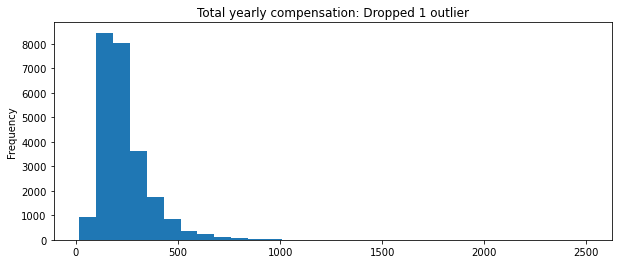

In [26]:
plt.figure(figsize=(10,4))
df.loc[df['totalyearlycompensation'] < 4000, 'totalyearlycompensation'].plot(kind='hist', bins=30)
plt.title('Total yearly compensation: Dropped 1 outlier');

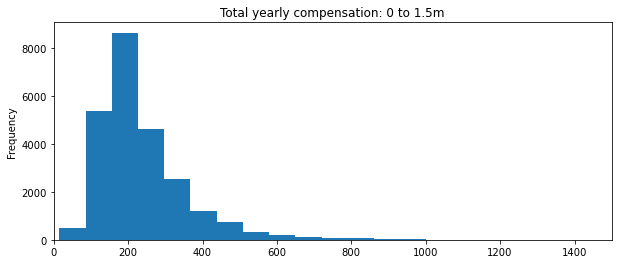

In [28]:
plt.figure(figsize=(10,4))
df['totalyearlycompensation'].plot(kind='hist', bins=70, xlim=(0,1500))
plt.title('Total yearly compensation: 0 to 1.5m');

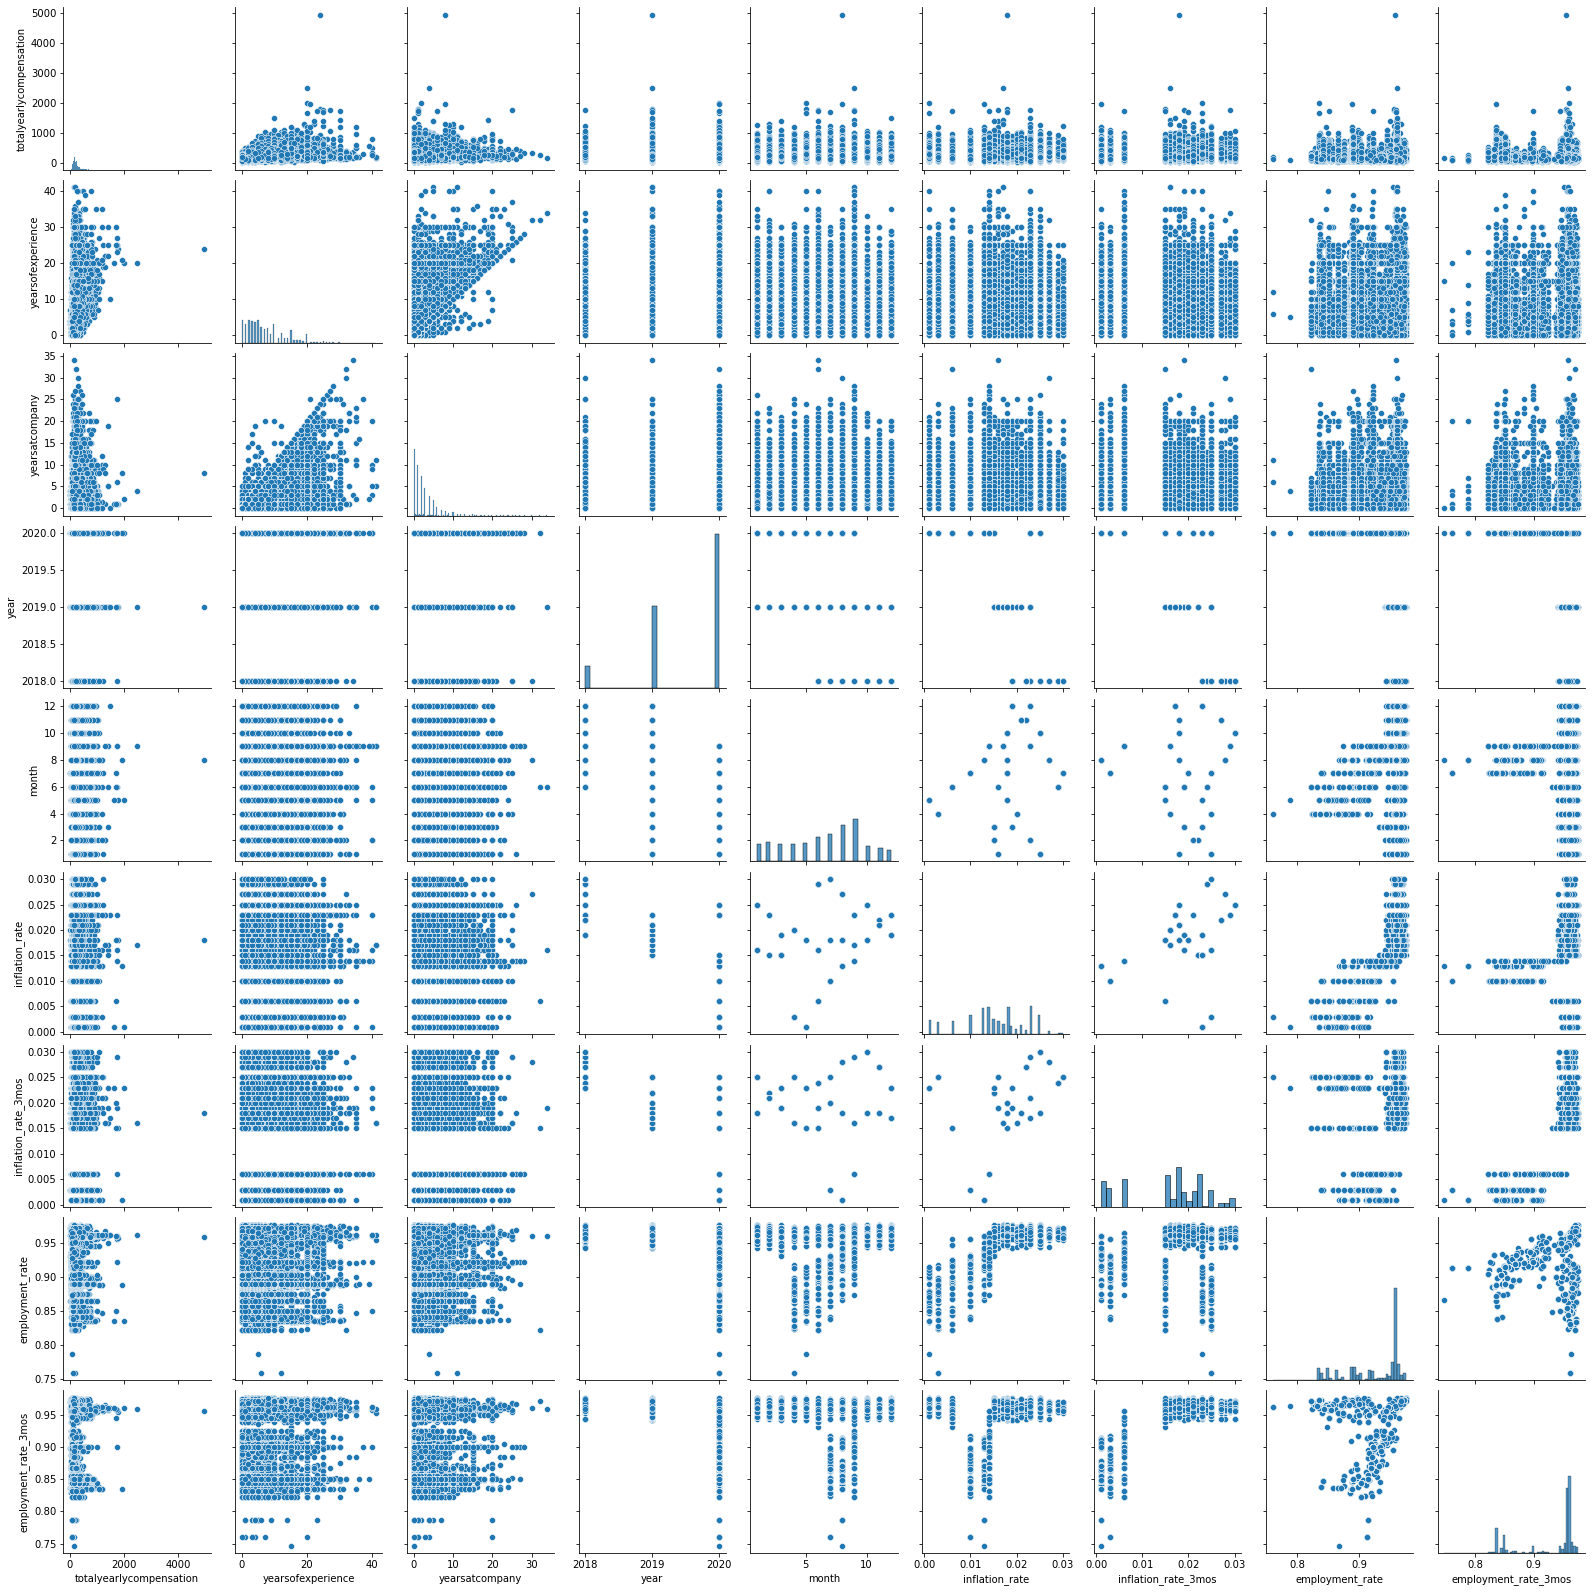

In [45]:
sns.pairplot(df);